In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
df=pd.read_csv("heart_disease_dataset.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [2]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [3]:
#Check data is gaussian distributed
import scipy.stats as stats
import pylab
def plot_data(df,feature):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

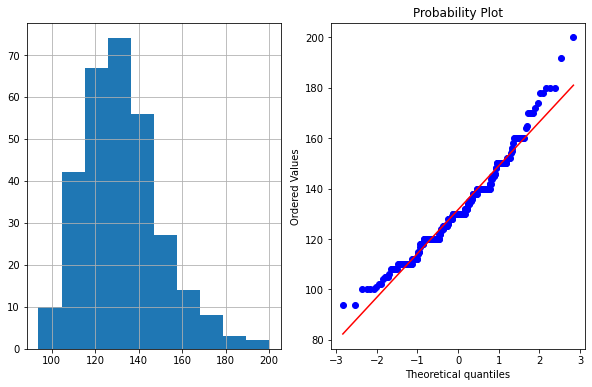

After Logirthimic Transformation


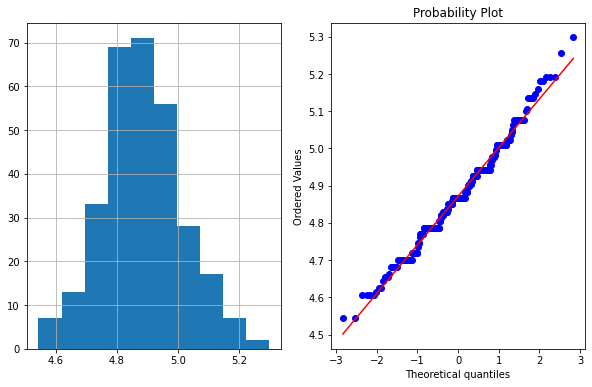

In [4]:
plot_data(df,"trestbps")
df["trestbps"]=np.log(df["trestbps"])
print("After Logirthimic Transformation")
plot_data(df,"trestbps")

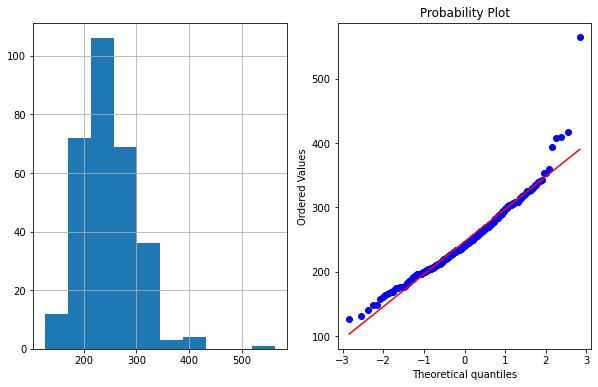

After Square root transformation


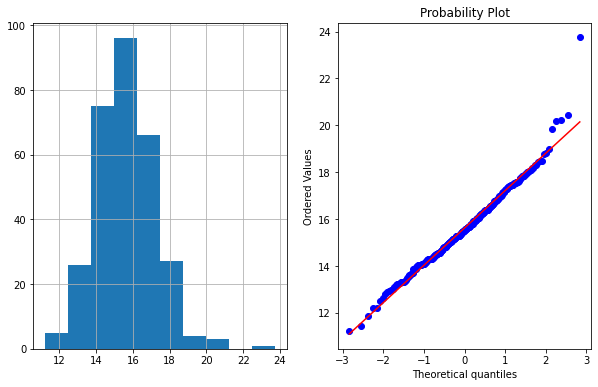

In [5]:
#Square root transformation
plot_data(df,"chol")
df["chol"]=df["chol"]**(1/2)
print("After Square root transformation")
plot_data(df,"chol")

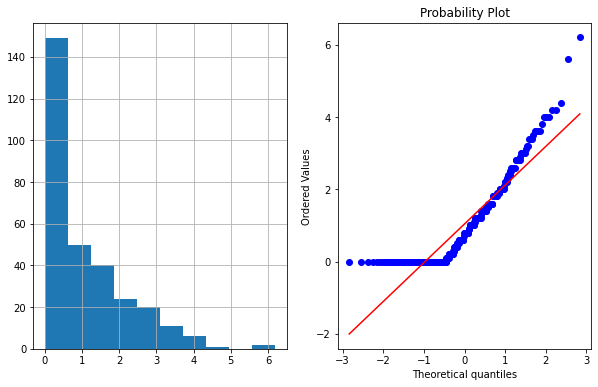

After Square root transformation


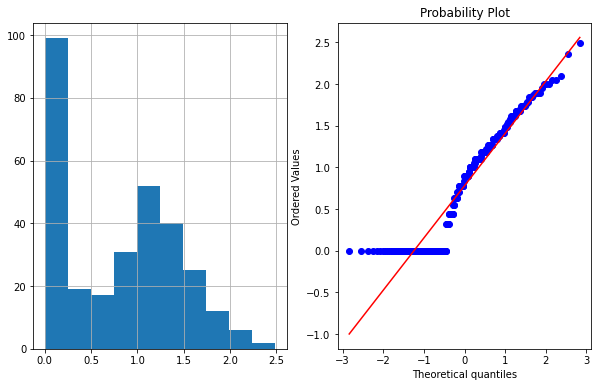

In [6]:
#Square root transformation
plot_data(df,"oldpeak")
df["oldpeak"]=df["oldpeak"]**(1/2)
print("After Square root transformation")
plot_data(df,"oldpeak")

In [7]:
col=['age', 'cp', 'trestbps', 'chol', 'thalach']

*********************** age *************************


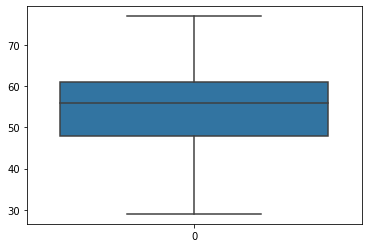

*********************** cp *************************


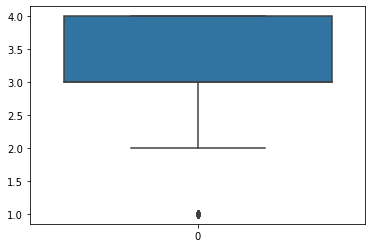

*********************** trestbps *************************


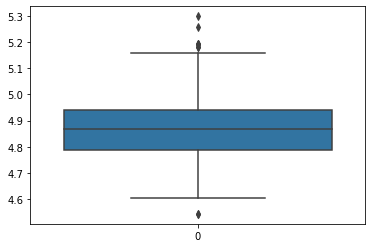

*********************** chol *************************


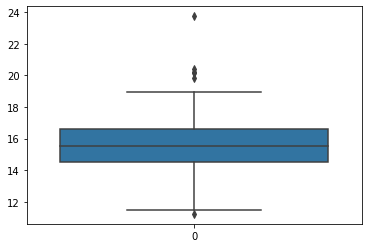

*********************** thalach *************************


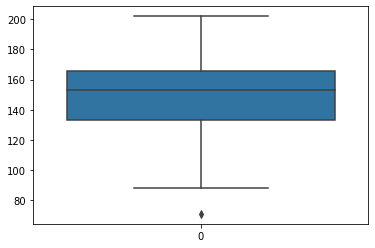

In [8]:
for i in col:
    print("***********************",i,"*************************")
    import seaborn as sns
    sns.boxplot(data=df[i])
    plt.pause(0.05)

In [9]:
def remove_outlier(low = 25, high = 75):
    numerical_features = [i for i in df.columns if df[i].dtype != "O"]
    df1 = df.copy()
    for i in numerical_features:
        if len(df1[i].unique()) > 10:
            q1, q3 = np.percentile(df[i], [low,high]) #First quartile and third quartile
            iqr = q3-q1 #Interquartile range
            lower_bound, upper_bound  = q1-1.5*iqr, q3+1.5*iqr
            df1 = df1.loc[(df1[i] > lower_bound) & (df1[i] < upper_bound)]
    return df1


*********************** age *************************


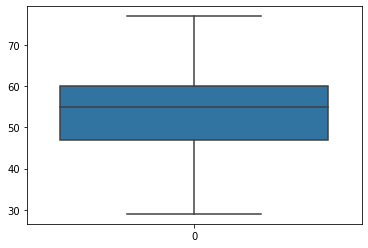

*********************** cp *************************


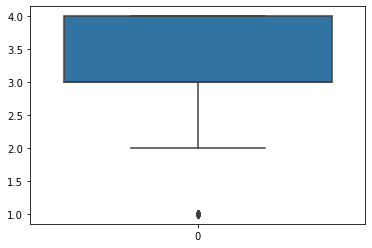

*********************** trestbps *************************


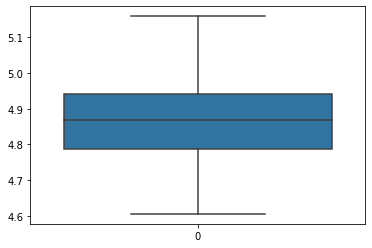

*********************** chol *************************


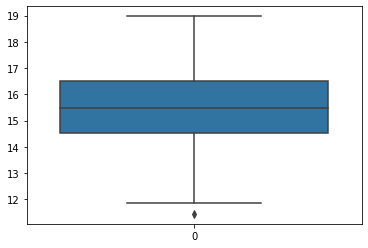

*********************** thalach *************************


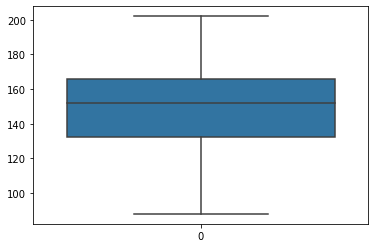

In [10]:
df=remove_outlier()
for i in col:
    print("***********************",i,"*************************")
    import seaborn as sns
    sns.boxplot(data=df[i])
    plt.pause(0.05)

No of 0: 156
No of 1: 131


<AxesSubplot:xlabel='target', ylabel='count'>

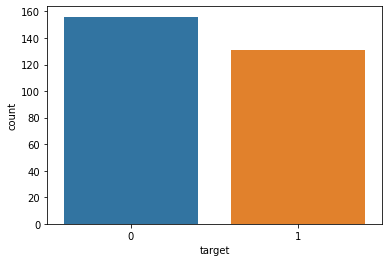

In [11]:
from collections import Counter
print("No of 0:",Counter(df['target'])[0])
print("No of 1:",Counter(df['target'])[1])
sns.countplot(x="target", data=df)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,4.976734,15.264338,1,2,150,0,1.516575,3,0,6,0
1,67,1,4,5.075174,16.911535,0,2,108,1,1.224745,2,3,3,1
2,67,1,4,4.787492,15.132746,0,2,129,1,1.612452,2,2,7,1
3,37,1,3,4.867534,15.811388,0,0,187,0,1.870829,3,0,3,0
4,41,0,2,4.867534,14.282857,0,2,172,0,1.183216,1,0,3,0


In [13]:
x=df.drop('target',axis=1)
y=df['target']
print(x.shape)
print(y.shape)

(287, 13)
(287,)


In [16]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.167247,0.696864,3.149826,4.864978,15.526320,0.139373,0.979094,149.536585,0.320557,0.767661,1.592334,-1393.073171,-692.205575
std,9.045721,0.460416,0.965411,0.118536,1.432497,0.346940,0.996277,22.632776,0.467506,0.650363,0.612524,11743.623921,8333.622961
min,29.000000,0.000000,1.000000,4.605170,11.445523,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000
25%,47.000000,0.000000,3.000000,4.787492,14.525839,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,4.867534,15.491933,0.000000,0.000000,152.000000,0.000000,0.774597,2.000000,0.000000,3.000000
75%,60.000000,1.000000,4.000000,4.941642,16.492395,0.000000,2.000000,166.000000,1.000000,1.264911,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,5.159055,18.973666,1.000000,2.000000,202.000000,1.000000,2.489980,3.000000,3.000000,7.000000


In [15]:
print("\nInfo\n")
print(x.info())
print("\nMaximum\n")
print(x.max())
print("\nMinimum\n")
print(x.min())



Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    int64  
 1   sex       287 non-null    int64  
 2   cp        287 non-null    int64  
 3   trestbps  287 non-null    float64
 4   chol      287 non-null    float64
 5   fbs       287 non-null    int64  
 6   restecg   287 non-null    int64  
 7   thalach   287 non-null    int64  
 8   exang     287 non-null    int64  
 9   oldpeak   287 non-null    float64
 10  slope     287 non-null    int64  
 11  ca        287 non-null    int64  
 12  thal      287 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 39.5 KB
None

Maximum

age          77.000000
sex           1.000000
cp            4.000000
trestbps      5.159055
chol         18.973666
fbs           1.000000
restecg       2.000000
thalach     202.000000
exang         1.000000
oldpeak       2.489980
slope 

<AxesSubplot:>

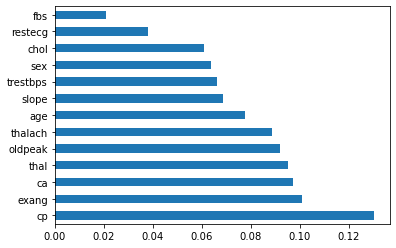

In [14]:
"""Feature Importance"""

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

feature_rank=pd.Series(model.feature_importances_,index=x.columns)
feature_rank.nlargest(len(x.columns)).plot(kind='barh')

In [15]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [16]:
def all_classifier(x,y): 
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    clf=[LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier(),
        DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),XGBClassifier()]
    
    dict={}
    for i in clf:
        classifier=i
        score=cross_val_score(classifier,x,y,cv=10)
        dict[str(i)[:-2]]=score.mean()
        #print(str(i)[:-2],"\nmean score:",score.mean(),'\n\n')

    return max(dict, key=dict.get),dict[max(dict, key=dict.get)]


In [61]:
all_classifier(x,y)

('RandomForestClassifier', 0.8392857142857142)

In [66]:
"""Randomized Search CV"""
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]

#Number of features to consider at every split
max_features=['auto','sqrt','log2']

#maximum no of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]

#Minimum no of sample required to split a node
min_samples_split=[2,5,10,14]

#minmum no of sample required at each leaf node
min_samples_leaf=[1,2,4,6,8]

#Create random grid
random_grid={'n_estimators':n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "criterion":['entropy','gini']}

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=100,
                               verbose=2,
                               random_state=100,
                               n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

rf_randomcv.best_params_
best=rf_randomcv.best_estimator_


y_pred=best.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

"""GridSearchCV"""
paran_grid={
           'criterion' : [rf_randomcv.best_params_['criterion']],
           "max_depth" : [rf_randomcv.best_params_['max_depth']],
           "max_features" : [rf_randomcv.best_params_['max_features']],
           
           "min_samples_leaf" : [rf_randomcv.best_params_['min_samples_leaf'],
                                 rf_randomcv.best_params_['min_samples_leaf']+2,
                                  rf_randomcv.best_params_['min_samples_leaf']+4],
                                  
           "min_samples_split" : [rf_randomcv.best_params_['min_samples_split']-2,
                                 rf_randomcv.best_params_['min_samples_split']+1,
                                  rf_randomcv.best_params_['min_samples_split'],
                                   rf_randomcv.best_params_['min_samples_split']+1,
                                    rf_randomcv.best_params_['min_samples_split']+2],
                                
            "n_estimators" : [rf_randomcv.best_params_['n_estimators'] - 200,
                              rf_randomcv.best_params_['n_estimators'] - 100,
                               rf_randomcv.best_params_['n_estimators'],
                                rf_randomcv.best_params_['n_estimators'] + 100,
                                 rf_randomcv.best_params_['n_estimators'] + 200]
            }

rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=paran_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x,y)
                                 
                                 
                                 
best_grid=grid_search.best_estimator_                                
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.4min finished


[[33  1]
 [ 6 18]]
0.8793103448275862
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.95      0.75      0.84        24

    accuracy                           0.88        58
   macro avg       0.90      0.86      0.87        58
weighted avg       0.89      0.88      0.88        58

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 14.3min finished


[[34  0]
 [ 2 22]]
Accuracy Score 0.9655172413793104
Classification report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.92      0.96        24

    accuracy                           0.97        58
   macro avg       0.97      0.96      0.96        58
weighted avg       0.97      0.97      0.97        58



In [67]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [70]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=14,
                       n_estimators=2000)

In [71]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=12,
                       n_estimators=2100)

In [72]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 2100}

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(229, 13) (58, 13) (229,) (58,)


In [20]:
classifier=RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=12,
                       n_estimators=2100)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=12,
                       n_estimators=2100)

In [21]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [24]:
import pickle
pickle.dump(classifier, open("Heart_Disease_UCI.sav", 'wb'))

In [25]:
import joblib
loaded_model = joblib.load("Heart_Disease_UCI.sav")

In [29]:
#X1=1
x1=[[67,1,4,4.787492,15.132746,0,2,129,1,1.612452,2,2,7]]
#X2=0
x2=[[37,1,3,4.867534,15.811388,0,0,187,0,1.870829,3,0,3]]

In [30]:
print("X1 prediction is: ",loaded_model.predict(x1))
print("X2 prediction is: ",loaded_model.predict(x2))

X1 prediction is:  [1]
X2 prediction is:  [0]
